# **Handson OpenCV** -3

In [39]:
# Importing necessary Liabraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [18]:
# create a black image
img = np.zeros((512,512,3), np.uint8)
# 1. np.zeros() is a function that creates an array of zeros
# 2. (512,512,3) is the shape of the array, the first two parameters are the height and width of the image, and the third parameter is the number of channels, in this case, 3 channels are used for RGB color
# 3. np.uint8 is the data type of the array, it is an 8-bit unsigned integer, which means it can store values from 0 to 255


In [19]:
cv.imshow('Black Image', img)
cv.waitKey(2000)
cv.destroyAllWindows()

In [20]:
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(20,200),(30,300),(255,0,0),5);
# 1. cv.line() is a function that draws a line on an image
# 2. (0,0) is the starting point of the line
# 3. (511,511) is the ending point of the line
# 4. (255,0,0) is the color of the line, in this case, it is blue
# 5. 5 is the thickness of the line in pixels


In [21]:
# Draw a rectangle
cv.rectangle(img,(384,0),(510,128),(0,255,0),3);

In [22]:
# Draw a circle
cv.circle(img,(447,63), 63, (0,0,255), -1);

In [23]:
# Draw a ellipse
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1);

In [24]:
# Drawing Polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255));

In [25]:
# Adding Text to Images
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'Handson',(10,500), font, 3,(255,255,255),2,cv.LINE_AA);


## **Arithmetic Operations on Images**

In [26]:
# Image Addition
x =np.uint8([250])
y =np.uint8([10])
print(cv.add(x,y)) # 250+10 = 260 => 255

[[260.]
 [  0.]
 [  0.]
 [  0.]]


In [27]:
# Image Addition
x =np.uint8([250])
y =np.uint8([10])
print(x+y);

[4]


In [29]:
#Image Blending
img1 =cv.imread("checkerboard_color.png")
assert img1 is not None , "Image not found"
img2 =cv.imread("coca-cola-logo.png")
assert img2 is not None , "Image not found"

#resize the images to the same size
img1 =cv.resize(img1,(512,512))
img2 =cv.resize(img2,(512,512))

dst =cv.addWeighted(img1,0.7,img2,0.3,0)
#here 0.7 is the weight of the first image and 0.3 is the weight of the second image
#0 is the gamma value
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()



## **Bitwise Operations**

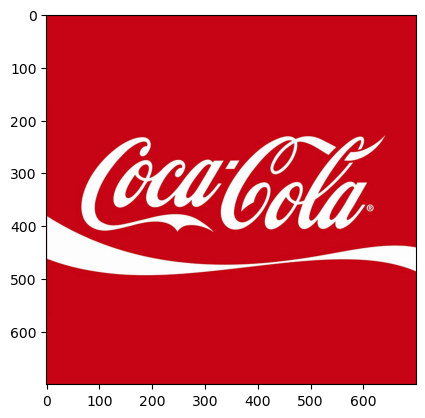

In [63]:
# Reading Foreground Image
img1 = cv.imread('coca-cola-logo.png')
assert img1 is not None, "Image not found"
img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.imshow(img1_rgb);


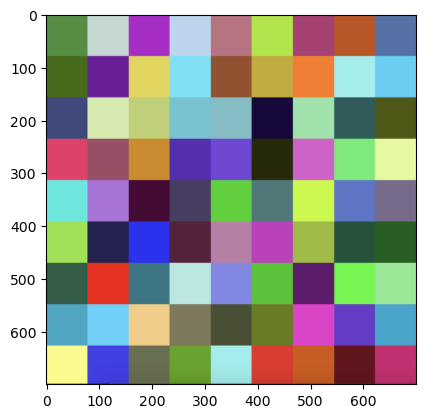

In [67]:
# Reading background Image
img2 = cv.imread('checkerboard_color.png')
assert img2 is not None, "Image not found"
img2_rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Resizing the images to the same size
aspect_ratio = img1.shape[0] / img2.shape[1]
dim = (img1.shape[1], int(img2.shape[0]*aspect_ratio))

# Resizing the images to the same size
img2_rgb = cv.resize(img2_rgb, dim, interpolation = cv.INTER_AREA)

# Alternative way to resize the images
# using resize function to resize the image to 700x700 pixels
#img2_rgb = cv.resize(img2_rgb,(700,700))

# Displaying the images
plt.imshow(img2_rgb);


(700, 700)


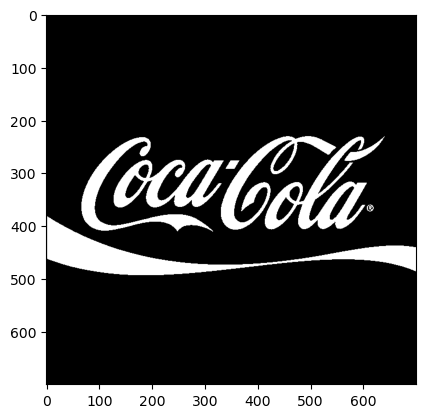

In [80]:
# Create mask for original image
# step 1: Convert the image to grayscale
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

# step 2: Convert the grayscale image to binary
ret, mask = cv.threshold(img1_gray, 140, 255, cv.THRESH_BINARY)

#here ret is the threshold value
#mask is the thresholded image
#cv.THRESH_BINARY is the thresholding type
#240 is the threshold value ,in simple words if the pixel value is greater than 240 then it will be converted to 255 else 0

plt.imshow(mask, cmap="gray")
print(mask.shape)

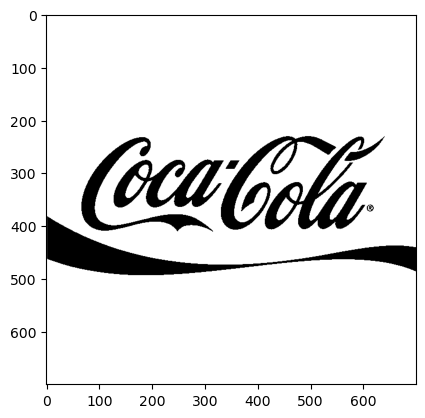

In [81]:
# Inverting the mask
mask_inv = cv.bitwise_not(mask)
plt.imshow(mask_inv, cmap="gray")


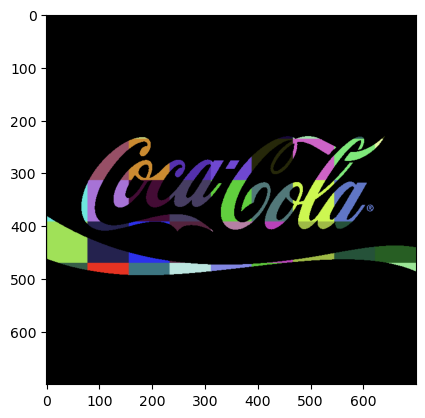

In [83]:
# apply background to the mask
fimg_bg = cv.bitwise_and(img2_rgb, img2_rgb, mask=mask)
plt.imshow(fimg_bg)

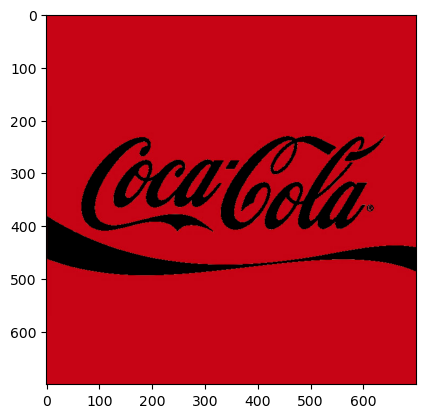

In [85]:
# Isolate foreground (red from original image) using the inverse mask
fimg_fg = cv.bitwise_and(img1_rgb, img1_rgb, mask=mask_inv)
plt.imshow(fimg_fg)

True

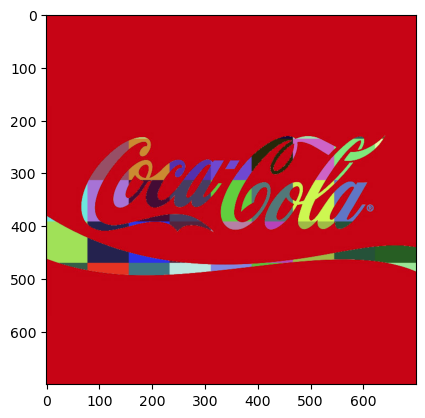

In [86]:
# Add the two previous results obtain the final result
result = cv.add(fimg_bg, fimg_fg)
plt.imshow(result)
cv.imwrite("logo_final.png", result[:, :, ::-1])
